The prediction accuracy for all classes is: 96.00%


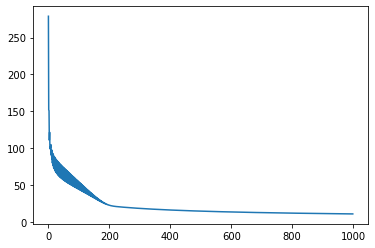

In [74]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# 读入数据
iris = datasets.load_iris()
x = iris.data
#x = x/np.max(x)
y = iris.target

# 划分训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size=0.33, random_state=0)
#print(train_x)
#encode y into onehot format
nb_classes =3
targets = train_y.reshape(-1)
y_onehot = np.eye(nb_classes)[targets]

#损失函数
def obj_fun(y,p):
    tmp = y*np.log(p)
    return np.sum(-tmp)

#初始化W
num_train = train_y.shape[0]
W0 = np.random.random([3,4])

#定义的softmax函数
def mysoft(x):
    y = np.exp(x)
    y = y/np.sum(y,axis =0)
    return y

#批处理方法求解W
iter = 0
r = 0.0012
loss = []
while iter < 1000:
    deltaW = np.zeros([3,1])
    temp_p = mysoft(W0.dot(train_x.T))
    deltaW = (y_onehot.T - temp_p).dot(train_x)
    W0 = W0 + r*deltaW
    loss.append(obj_fun(y_onehot.T,temp_p))
    iter = iter +1

#对验证集进行测试，并得到识别率
tmp_pre = mysoft(W0.dot(test_x.T))
indice = np.argmax(tmp_pre,axis = 0)
pre = indice

plt.plot(loss) 

correct = pre.reshape(-1) == test_y.reshape(-1)
acc = sum(correct.astype(int))/test_y.shape[0]
print('The prediction accuracy for all classes is: %.2f%%' %(acc*100))